# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 1. It implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.01,0.33,0.00,0.94,0.21,0.11,0.26,0.37,0.22,0.74,...,0.0,0.44,0.73,0.90,0.73,0.85,0.01,0.45,0.47,0.0
1,0.01,0.09,0.02,0.89,0.23,0.13,0.07,0.71,0.27,0.15,...,0.0,0.24,0.37,0.25,0.46,0.34,0.00,1.00,0.06,0.0
2,0.01,0.53,0.02,0.92,0.21,0.03,0.98,1.00,1.00,0.20,...,0.0,0.17,0.32,0.13,0.04,0.18,0.01,0.32,0.01,0.0
3,0.01,0.36,0.00,0.98,0.02,0.00,0.42,0.45,0.29,0.53,...,0.0,0.01,0.81,0.50,0.65,0.76,0.04,0.11,0.00,0.0
4,0.01,0.68,0.01,0.98,0.04,0.01,0.71,0.60,0.62,0.39,...,0.0,0.10,0.71,0.67,0.73,0.55,0.08,0.06,0.07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.03,0.39,0.19,0.84,0.01,0.01,0.40,0.44,0.29,0.52,...,0.0,0.03,0.87,0.72,0.89,0.87,0.04,0.20,0.01,0.0
294,0.06,0.33,0.08,0.84,0.31,0.09,0.26,0.43,0.26,0.61,...,0.0,0.39,0.70,0.77,0.76,0.75,0.01,0.71,0.55,0.0
295,0.02,0.43,0.01,0.90,0.09,0.10,0.38,0.39,0.23,0.44,...,0.0,0.13,0.48,0.45,0.63,0.66,0.02,0.25,0.06,0.0
296,0.01,0.35,0.25,0.80,0.03,0.01,0.38,0.41,0.25,0.58,...,0.0,0.02,0.81,0.60,0.79,0.80,0.04,0.10,0.01,0.0


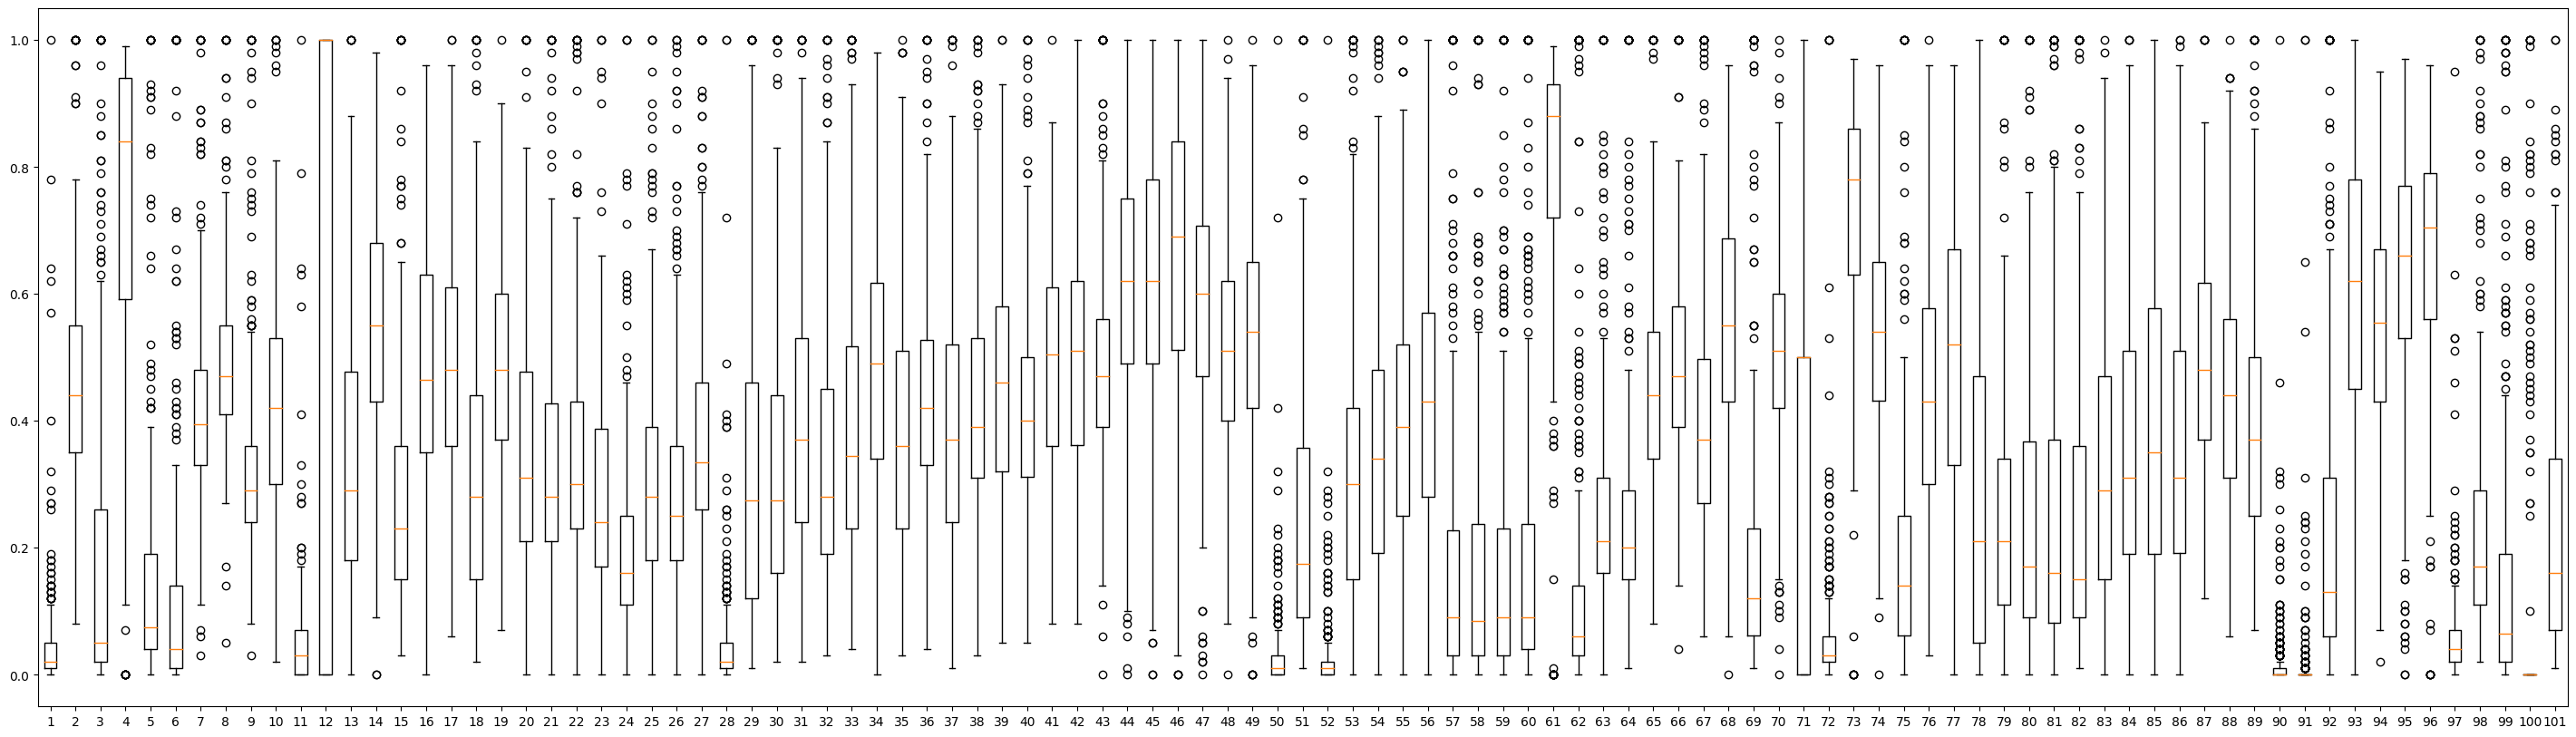

In [3]:
# load data
train = pandas.read_csv('Data/Q1/communities_train.csv')
val = pandas.read_csv('Data/Q1/communities_val.csv')
test = pandas.read_csv('Data/Q1/communities_test.csv')

# Pull out X and y components of the data
# if you want to convert this data to numpy format, you can add .to_numpy() to the end of each row below
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]
X_val = val.iloc[:,0:-1]
y_val = val.iloc[:,-1]
X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

X_train.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize=[36, 10])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(train)

X_train

In [4]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing

mu_train = X_train.mean()
sigma_train = X_train.std()

X_train_std = (X_train - mu_train) / sigma_train
X_val_std = (X_val - mu_train) / sigma_train  # Use mean and std from training set for validation set
X_test_std = (X_test - mu_train) / sigma_train # Use mean and std from training set for test set

Y_mu = y_train.mean()
Y_sigma = y_train.std()

Y_train_std = (y_train - Y_mu) / Y_sigma
Y_mu_val_std = (y_val - Y_mu) / Y_sigma  # Use mean and std from training set for validation set
Y_test_std = (y_test - Y_mu) / Y_sigma # Use mean and std from training set for test set

In [5]:
# train your Linear Regression model here. Data has already been split into predictors (X_train, X_val and X_test) and the
# desired response (y_train, y_val and y_test above).
#
# Note that you DO NOT NEED to remove any variables, or add higher order terms. JUST USE THE DATA AS IS.

# Once you've trained the model, evaluate it. This would include:
#  - Measuring the accuracy of the model (i.e. RMSE or similar measures)
#  - Looking at the properties of the fitted model, for example the R^2, and if all terms are contributing to the model
#  - Considering the validity of the trained model. This could include assumptions about independent predictors, and the 
#    distribution of the residuals
# Your write-up should include your findings regarding the above.

model_1 = sm.OLS(y_train, X_train)
trained_model = model_1.fit()
model_summary = trained_model.summary()

print(model_summary)

                                  OLS Regression Results                                  
Dep. Variable:      ViolentCrimesPerPop    R-squared (uncentered):                   0.890
Model:                               OLS   Adj. R-squared (uncentered):              0.834
Method:                    Least Squares   F-statistic:                              15.99
Date:                   Sat, 16 Mar 2024   Prob (F-statistic):                    2.30e-58
Time:                           10:25:36   Log-Likelihood:                          250.64
No. Observations:                    298   AIC:                                     -301.3
Df Residuals:                        198   BIC:                                      68.43
Df Model:                            100                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

In [6]:
#trained_model_html = model_summary.tables[1].as_html()

#summary = pandas.read_html(trained_model_html, header=0, index_col=0)[0]

#summary.to_csv('summary.csv')

#print(summary)

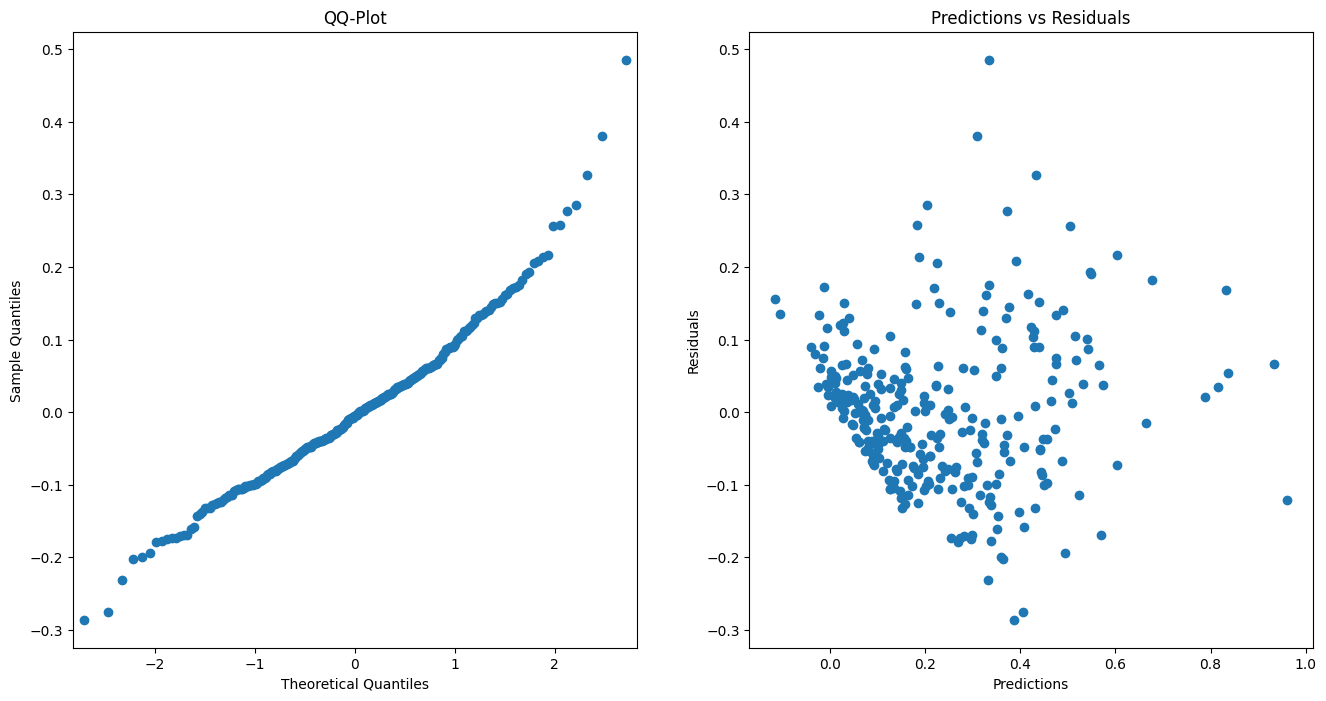

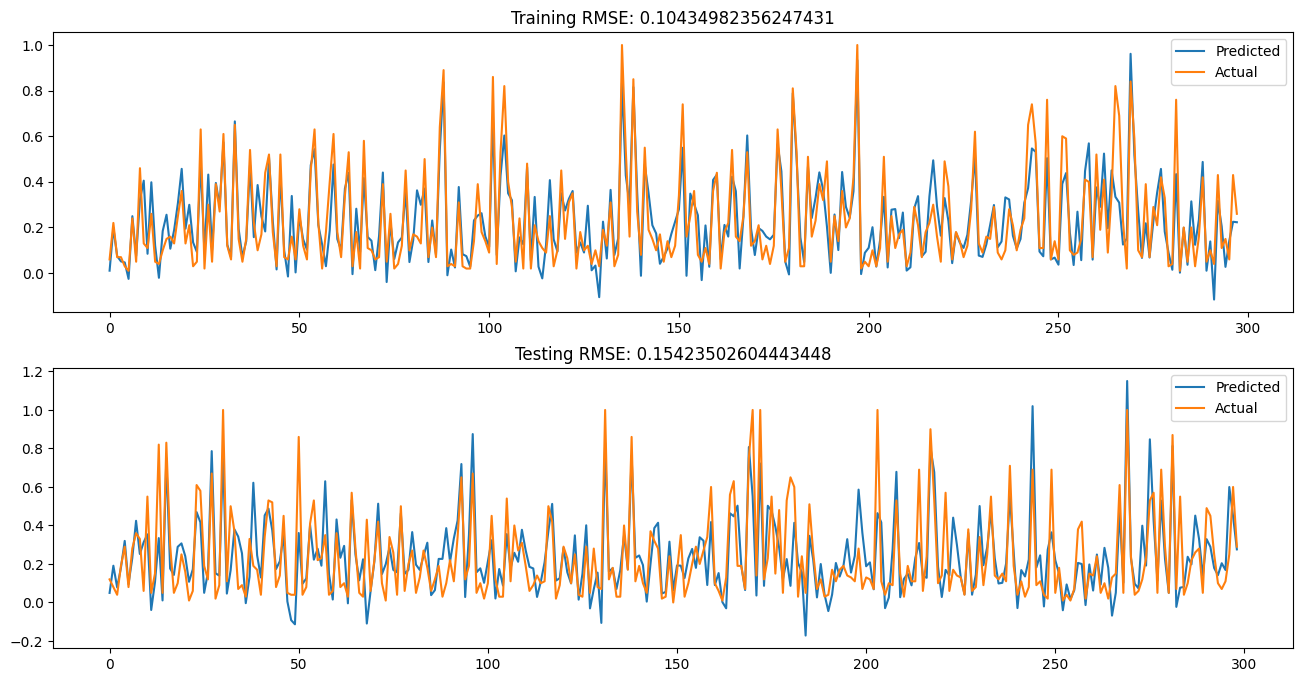

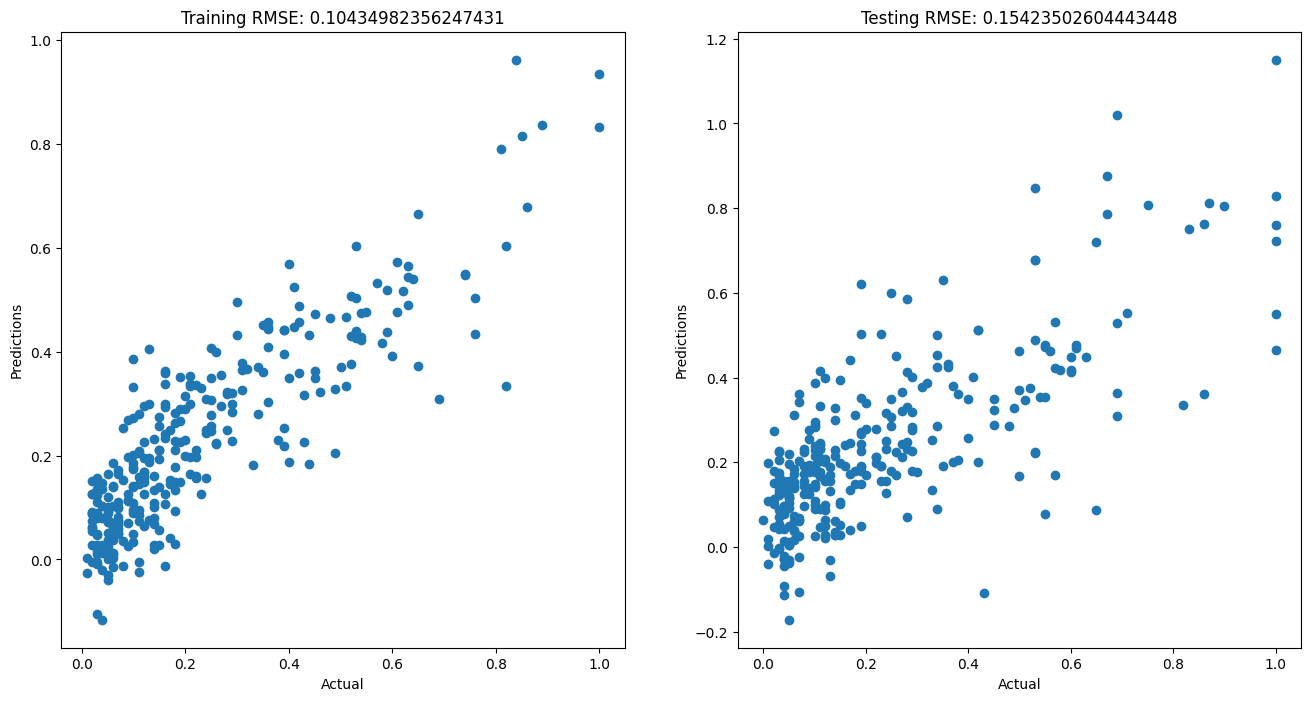

In [7]:
# This function has been borrowed from the tutorial, as it is extremely convinent. 

def plot_diagnoistics(trained_model, resid, X_train, Y_train, X_test, Y_test, show_line = True, show_scatter = True, Y_mu = 0, Y_sigma = 1):

    # undo standardisation, multiply by sigma, add mu
    Y_train_pred = trained_model.predict(X_train)*Y_sigma + Y_mu
    Y_test_pred = trained_model.predict(X_test)*Y_sigma + Y_mu
    
    # undo standardisation for testing data
    Y_train_scaled = Y_train*Y_sigma + Y_mu
    Y_test_scaled = Y_test*Y_sigma + Y_mu

    fig = plt.figure(figsize=[16, 8])
    ax = fig.add_subplot(1, 2, 1)
    f = sm.qqplot(resid, ax=ax)
    ax.set_title('QQ-Plot')    

    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(Y_train_pred, resid)
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Residuals')
    ax.set_title('Predictions vs Residuals')

    rmse_train = numpy.sqrt(numpy.mean((Y_train_pred - Y_train_scaled)**2))
    rmse_test = numpy.sqrt(numpy.mean((Y_test_pred - Y_test_scaled)**2))

    if show_line:
        fig = plt.figure(figsize=[16, 8])
        ax = fig.add_subplot(2, 1, 1)
        ax.plot(numpy.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
        ax.plot(numpy.arange(len(Y_train_pred)), Y_train_scaled, label='Actual')
        ax.set_title("Training RMSE: {}".format(rmse_train))
        ax.legend()

        ax = fig.add_subplot(2, 1, 2)
        ax.plot(numpy.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
        ax.plot(numpy.arange(len(Y_test_pred)), Y_test_scaled, label='Actual')
        ax.set_title("Testing RMSE: {}".format(rmse_test))
        ax.legend()

    if show_scatter:
        fig = plt.figure(figsize=[16, 8])
        ax = fig.add_subplot(1, 2, 1)
        ax.scatter(Y_train_scaled, Y_train_pred)
        v = int(numpy.min([numpy.max(Y_train_scaled), numpy.max(Y_train_pred)]))
        ax.plot(numpy.arange(0, v))
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predictions')
        ax.set_title("Training RMSE: {}".format(rmse_train))

        ax = fig.add_subplot(1, 2, 2)
        ax.scatter(Y_test_scaled, Y_test_pred)
        v = int(numpy.min([numpy.max(Y_test_scaled), numpy.max(Y_test_pred)]))
        ax.plot(numpy.arange(0, v))
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predictions')
        ax.set_title("Testing RMSE: {}".format(rmse_test))

plot_diagnoistics(trained_model, trained_model.resid, X_train, y_train, X_test, y_test, show_line=True)

In [25]:
lambdas = numpy.logspace(-8,1,80)
rsme_train = []
rsme_validation = []
best_lambda_train = None
best_lambda_validation = None
best_rmse_train = float('inf')
best_rmse_validation = float('inf')
coeffs = []

for l in lambdas:
    trained_model_ridge = sm.OLS(y_train, X_train).fit_regularized(alpha=l, L1_wt=0.0)

    coeffs.append(trained_model_ridge.params)
    
    # Calculate RMSE for training set
    rmse_training = numpy.sqrt(numpy.mean((trained_model_ridge.predict(X_train) - y_train)**2))
    rsme_train.append(rmse_training)
    
    # Calculate RMSE for validation set
    rmse_validationing = numpy.sqrt(numpy.mean((trained_model_ridge.predict(X_val) - y_val)**2))
    rsme_validation.append(rmse_validationing)
    
    # Update best lambda for training set
    if rmse_training < best_rmse_train:
        best_rmse_train = rmse_training
        best_lambda_train = l
    
    # Update best lambda for validation set
    if rmse_validationing < best_rmse_validation:
        best_rmse_validation = rmse_validationing
        best_lambda_validation = l

print("Best Lambda for Training Set:", best_lambda_train)
print("Best RMSE for Training Set:", best_rmse_train)

print("Best Lambda for Validation Set:", best_lambda_validation)
print("Best RMSE for Validation Set:", best_rmse_validation)

Best Lambda for Training Set: 1e-08
Best RMSE for Training Set: 0.10434982396233183
Best Lambda for Validation Set: 0.0029400480643347075
Best RMSE for Validation Set: 0.14307612076200696


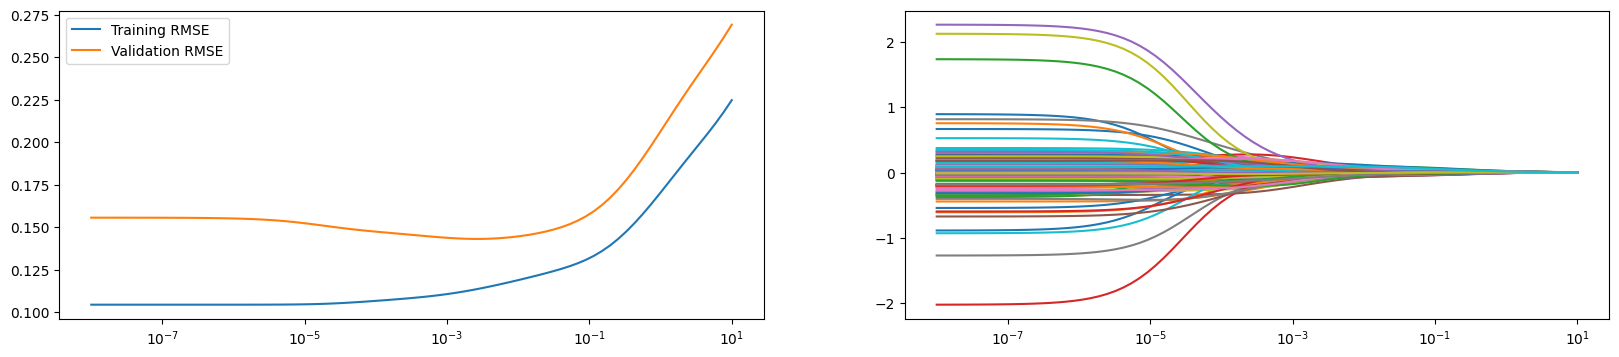

In [27]:
fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambdas, rsme_train, label='Training RMSE')
ax.plot(lambdas, rsme_validation, label='Validation RMSE')
# set x-axis to log scale
ax.set_xscale('log')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(lambdas, coeffs)
ax.set_xscale('log')


R2 Train 0.7583913655038019


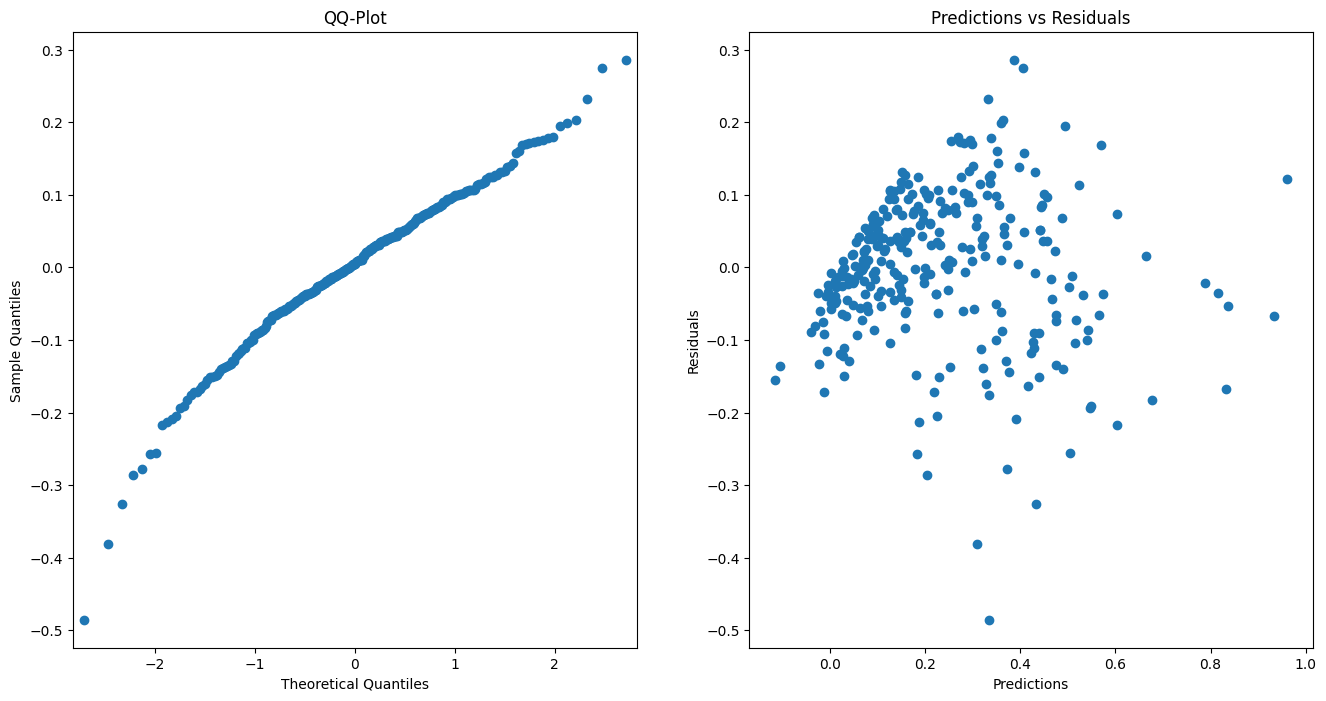

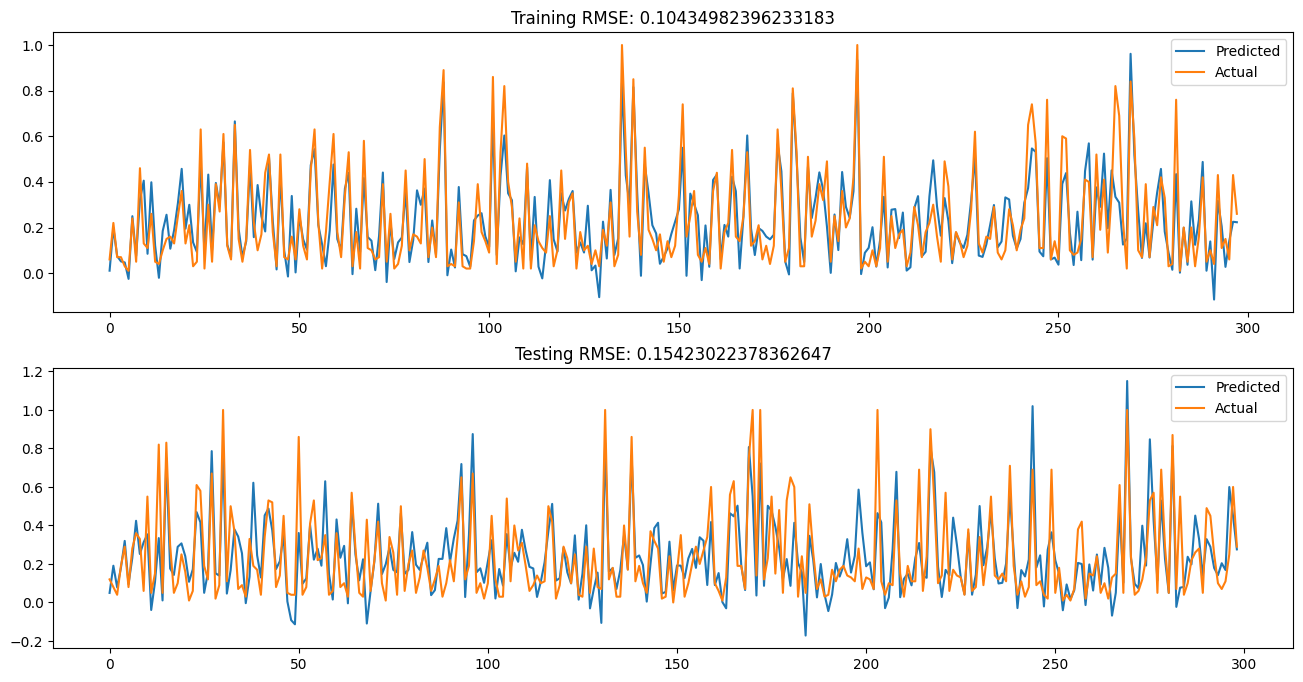

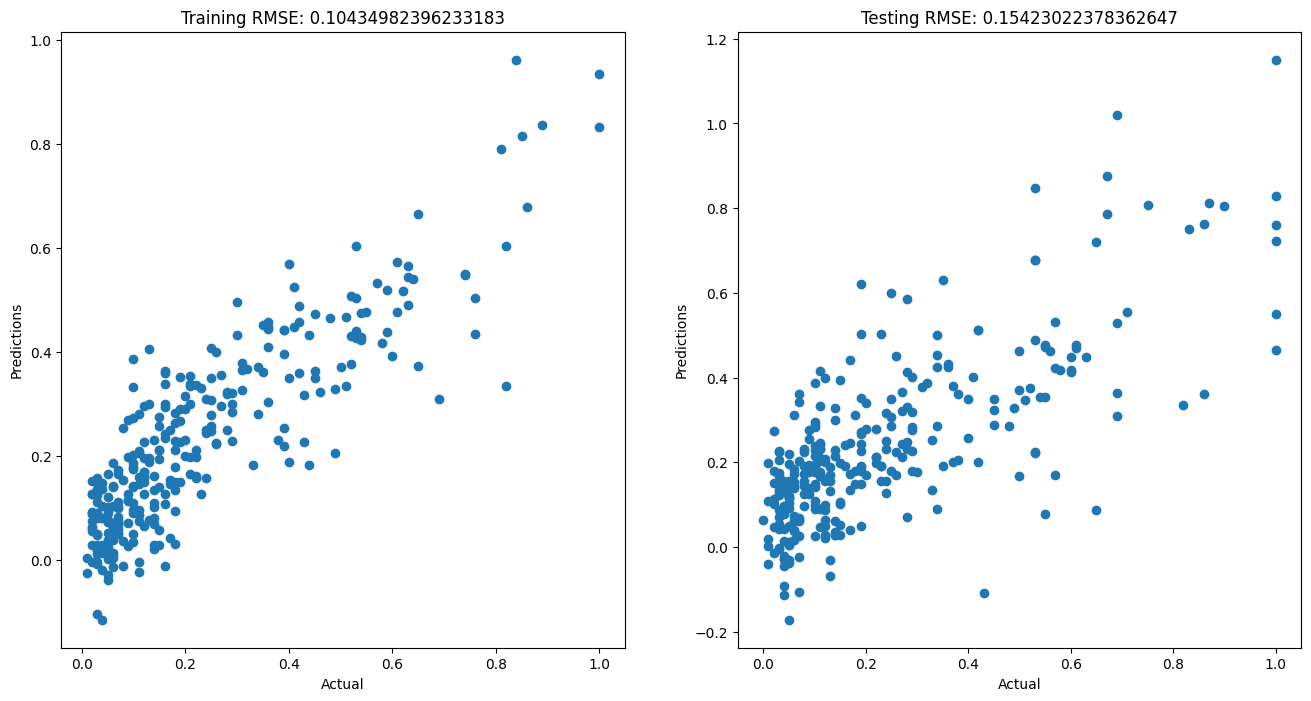

In [40]:
# train your regularised models (ridge and lasso). Here you will use the same data as you used in for the above regression model
#
# One key consideration with your regularised models is the selection of lambda (i.e. the strength of the regularisation). A suggested 
# starting point for finding your value of lambda is suggested below using numpy.logspace (see 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). The code below will give you 50 values starting at 10-10 and 
# finishing at 1, spread on a log scale. Just note that for plotting things that result from this, you may want to change the scale of 
# your x-axis to a log scale (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)
#
# Note that the below list of lambda is going to be fairly coarse. For the sake of speed, we suggest that you avoid evaluating a huge
# number of lambdas in one pass, but you can get a more precise estimate by refining your estimate over multiple passes (i.e. if your
# initial estimate if 0.1, you could run the search again now looking over a range of [0.01 .. 1.0] or similar).
#
# remember that lambda is a keyword in python, so we're calling the array below alphas
#
trained_model_ridge = sm.OLS(y_train, X_train).fit_regularized(alpha=best_lambda_validation, L1_wt=0.0)

pred_train_ridge = trained_model_ridge.predict(X_train)
print("R2 Train", r2_score(y_train, pred_train_ridge))

plot_diagnoistics(trained_model_ridge, trained_model_ridge.predict(X_train) - y_train, 
                  X_train, y_train, X_test, y_test, show_line=True)

In [28]:
lambdas = numpy.logspace(-8,1,80)
rsme_train = []
rsme_validation = []
best_lambda_train = None
best_lambda_validation = None
best_rmse_train = float('inf')
best_rmse_validation = float('inf')
coeffs = []

# I have borrowed this code and modified it so that I could see what lambda specifically was the best.
for l in lambdas:
    trained_model_lasso = sm.OLS(y_train, X_train).fit_regularized(alpha=l, L1_wt=1.0)

    coeffs.append(trained_model_lasso.params)
    
    # Calculate RMSE for training set
    rmse_training = numpy.sqrt(numpy.mean((trained_model_lasso.predict(X_train) - y_train)**2))
    rsme_train.append(rmse_training)
    
    # Calculate RMSE for validation set
    rmse_validationing = numpy.sqrt(numpy.mean((trained_model_lasso.predict(X_val) - y_val)**2))
    rsme_validation.append(rmse_validationing)
    
    # Update best lambda for training set
    if rmse_training < best_rmse_train:
        best_rmse_train = rmse_training
        best_lambda_train = l
    
    # Update best lambda for validation set
    if rmse_validationing < best_rmse_validation:
        best_rmse_validation = rmse_validationing
        best_lambda_validation = l

print("Best Lambda for Training Set:", best_lambda_train)
print("Best RMSE for Training Set:", best_rmse_train)

print("Best Lambda for Validation Set:", best_lambda_validation)
print("Best RMSE for Validation Set:", best_rmse_validation)

Best Lambda for Training Set: 1.4606863203649888e-06
Best RMSE for Training Set: 0.11617446527932056
Best Lambda for Validation Set: 1e-08
Best RMSE for Validation Set: 0.14042665920440456


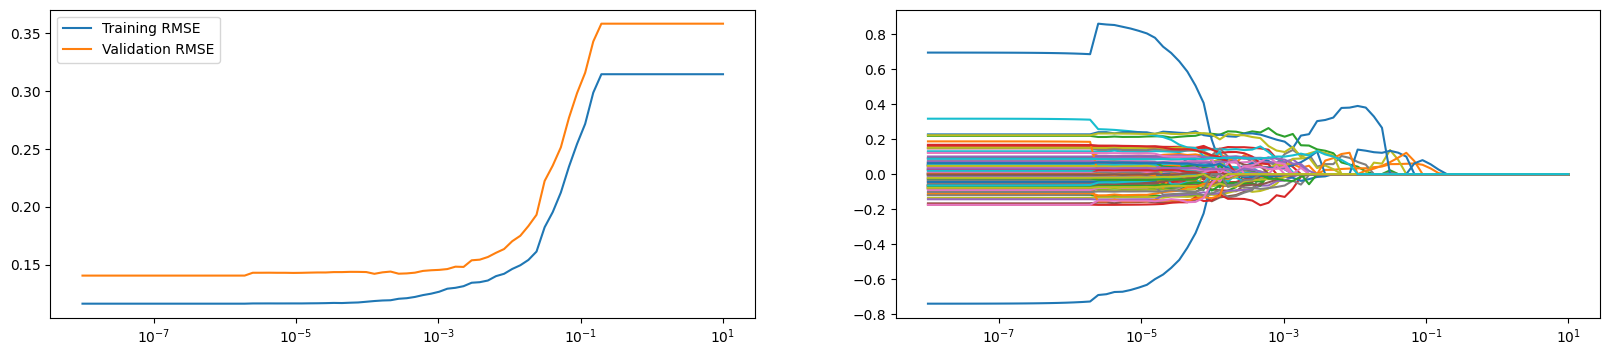

In [29]:
fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambdas, rsme_train, label='Training RMSE')
ax.plot(lambdas, rsme_validation, label='Validation RMSE')
# set x-axis to log scale
ax.set_xscale('log')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(lambdas, coeffs)
ax.set_xscale('log')

R2 Train 0.700530324534965


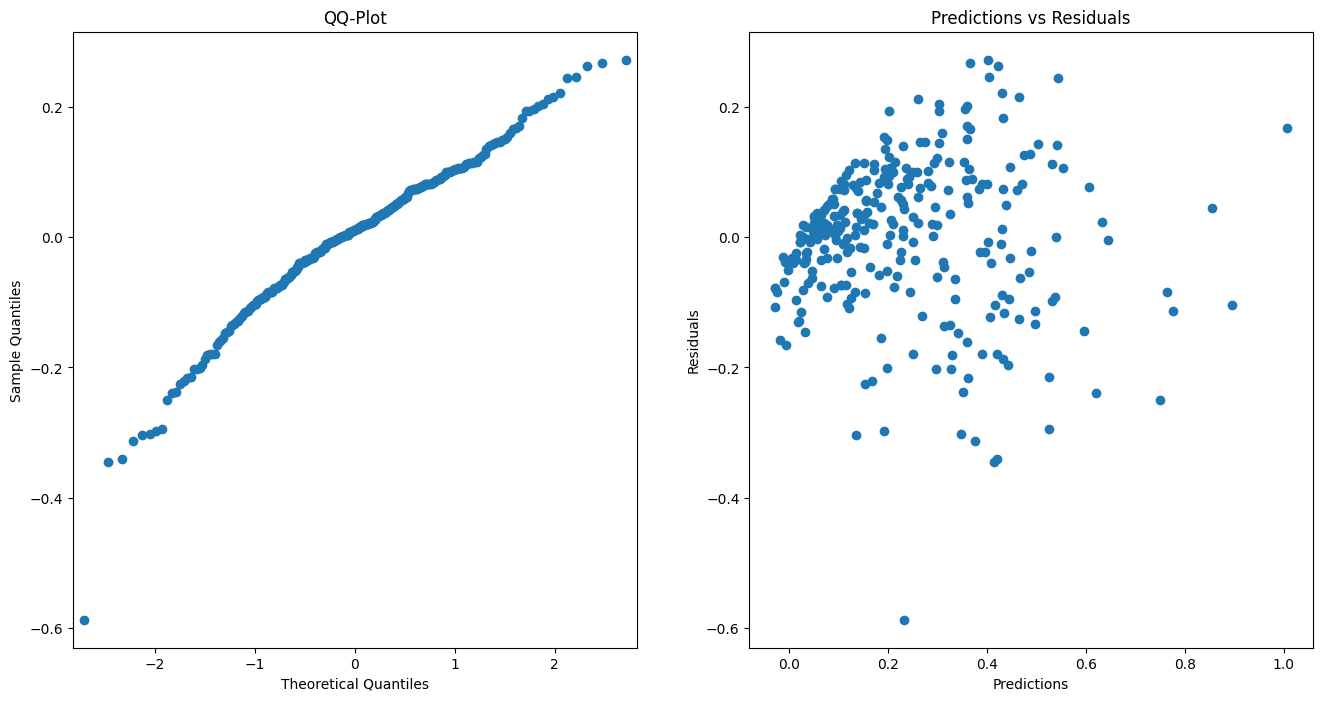

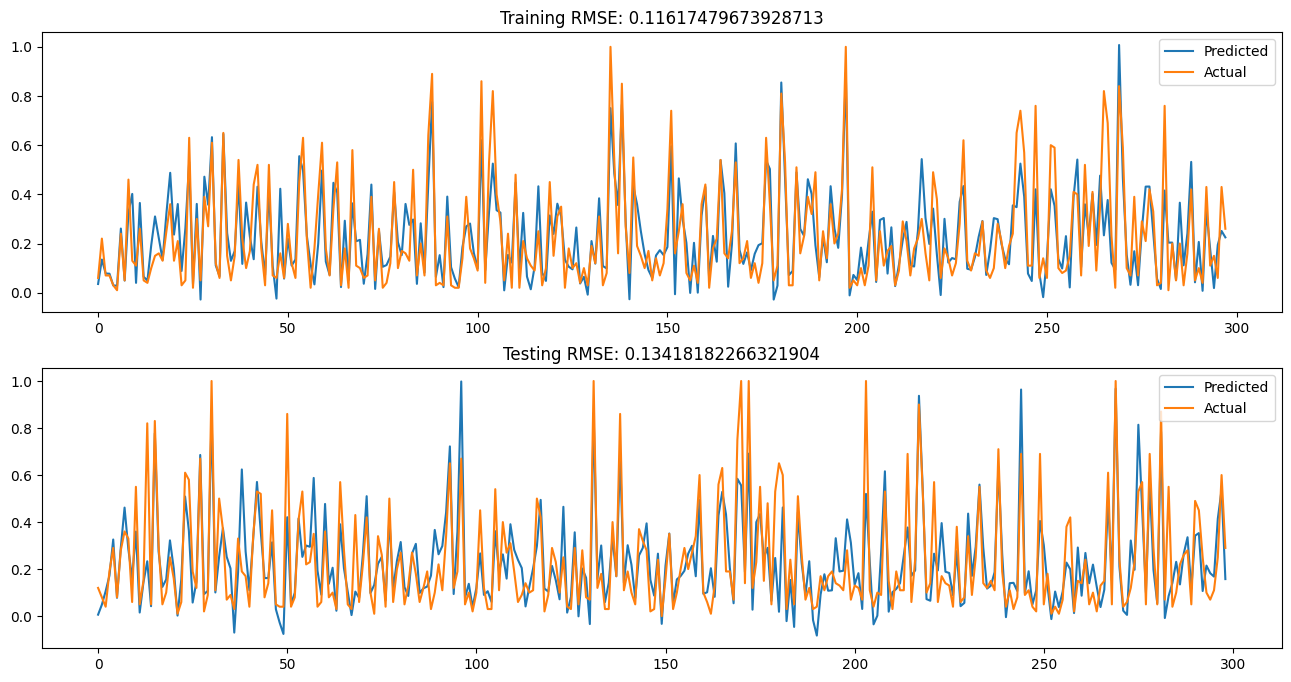

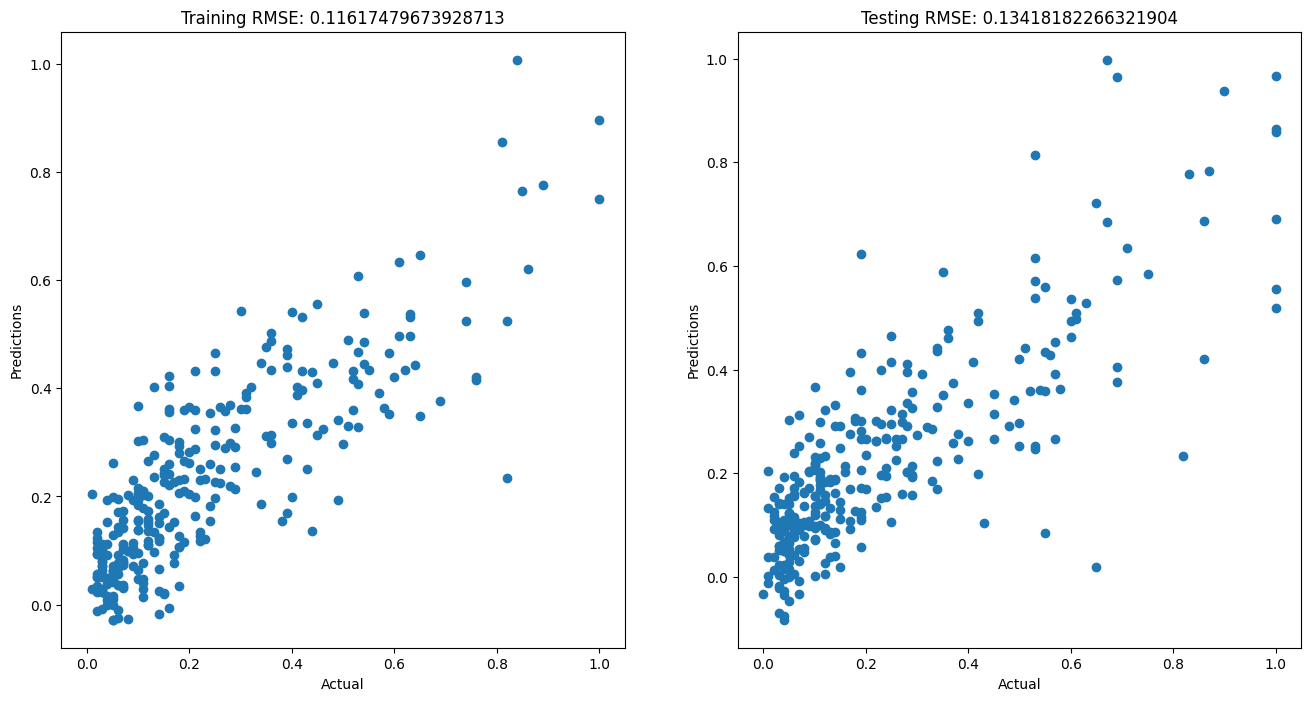

In [39]:
trained_model_lasso = sm.OLS(y_train, X_train).fit_regularized(alpha=best_lambda_validation, L1_wt=1.0)

pred_train_lasso = trained_model_lasso.predict(X_train)
print("R2 Train", r2_score(y_train, pred_train_lasso))

plot_diagnoistics(trained_model_lasso, trained_model_lasso.predict(X_train) - y_train, 
                  X_train, y_train, X_test, y_test, show_line=True)

In [14]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the values of lambda used in your regularised models, and what those values are
# - a comparison of three models, considering both the accuracy and validity of the models, as outlined above, this means:
#   > accuracy of the model
#   > measures of fit, such as R^2
#   > testing assumptions about the independence of predictors, and the distribution of the residuals
# - A discussion of the ethical concerns that need to be considered when evaluating the models developed for this problem
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT